In [ ]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
%cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/

Mounted at /content/drive
/content/drive/Shareddrives/BUAT DIEGO/Data-retail-2015-2022-keluar


In [ ]:
import os, warnings, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model, callbacks

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed = 0
seed_everything(seed)
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# df2015 = pd.read_csv('./data-2015-renew.csv')
df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
# df2020 = pd.read_csv('./data-2020-renew.csv')
# df2021 = pd.read_csv('./data-2021-renew.csv')
# df2022 = pd.read_csv('./data-2022-renew.csv')

In [ ]:
df2016 = df2016.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2017 = df2017.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'namabarang', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [ ]:
df = pd.concat([df2016, df2017, df2018])

In [ ]:
df['month_yr'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [ ]:
df['month_yr'] = df['month_yr'].map({'01-16':0,'02-16':1,'03-16':2,'04-16':3,'05-16':4,'06-16':5,'07-16':6,'08-16':7,'09-16':8,'10-16':9,'11-16':10,'12-16':11,
                                          '01-17':12,'02-17':13,'03-17':14,'04-17':15,'05-17':16,'06-17':17,'07-17':18,'08-17':19,'09-17':20,'10-17':21,'11-17':22,'12-17':23,
                                          '01-18':24,'02-18':25,'03-18':26,'04-18':27,'05-18':28,'06-18':29,'07-18':30,'08-18':31,'09-18':32,'10-18':33,'11-18':34,'12-18':35})

In [ ]:
print(f"Min date from data set: {df['tgl'].min().date()}")
print(f"Max date from data set: {df['tgl'].max().date()}")

Min date from data set: 2016-01-01
Max date from data set: 2018-12-31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8923868 entries, 0 to 3044193
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   satuan        object        
 2   qty           float64       
 3   barcode       object        
 4   kodejenis     object        
 5   kodekategori  float64       
 6   month_yr      int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 544.7+ MB


In [ ]:
df.head()

,tgl,satuan,qty,barcode,kodejenis,kodekategori,month_yr
0,2016-10-28 12:09:33.220,PCS,4.00,8991038110354,10507,105.00,9
1,2016-01-02 15:51:33.187,PCS,1.00,4902430400664,10304,103.00,0
2,2016-07-22 18:48:08.593,PCS,1.00,8992772198011,10506,105.00,6
3,2016-06-24 11:46:13.417,PCS,1.00,8992933621112,20102,201.00,5
4,2016-11-06 13:57:40.160,PCS,2.00,3014260842956,10307,103.00,10


In [ ]:
train_monthly = df[['tgl', 'month_yr', 'barcode', 'qty']]
train_monthly = train_monthly.sort_values('tgl').groupby(['month_yr', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_yr', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_yr').groupby(['barcode'])['qty_cnt'].shift(-1)

display(train_monthly.head())
# display(train_monthly.describe())

,month_yr,barcode,qty_cnt,qty_cnt_month
0,0,00100809,16.78,19.53
1,0,00113731,12.03,4.82
2,0,00129213,42.88,3.45
7,0,00133296,0.79,0.46
9,0,00133470,5.85,13.15


In [ ]:
monthly_series = train_monthly.pivot_table(index=['barcode'], columns='month_yr',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_yr,barcode,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,0000003624241,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,00100809,16.78,19.53,26.94,20.63,17.41,16.61,12.52,13.85,42.35,...,20.04,15.83,14.22,19.72,20.78,19.90,12.00,11.78,14.68,14.05
2,00113731,12.03,4.82,6.13,4.16,4.84,4.40,6.23,6.69,29.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00125789,0.00,0.00,4.94,0.40,0.00,0.00,17.06,1.29,13.01,...,0.00,0.84,0.67,23.76,7.98,21.34,0.00,18.12,0.00,1.40
4,00126588,0.00,0.00,0.00,0.00,0.00,6.34,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
first_month = 23
last_month = 35
serie_size = 12
data_series = []

for index, row in monthly_series.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)

columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()

,barcode,0,1,2,3,4,5,6,7,8,9,10,11,label
0,0000003624241,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,00100809,11.39,14.40,12.55,20.04,15.83,14.22,19.72,20.78,19.90,12.00,11.78,14.68,14.05
2,00113731,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00125789,24.00,0.00,0.00,0.00,0.84,0.67,23.76,7.98,21.34,0.00,18.12,0.00,1.40
4,00126588,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
data_series = data_series.drop(['barcode'], axis=1)

In [ ]:
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)

In [ ]:
print("Train set", train.shape)
print("Validation set", valid.shape)
train.head()

Train set (26949, 12)
Validation set (2995, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
10045,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25070,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
28015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9088,2.00,2.00,4.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00
26934,1.00,1.00,0.00,2.00,0.00,2.00,0.00,0.00,5.00,0.00,3.00,0.00


In [ ]:
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set reshaped (26949, 12, 1)
Validation set reshaped (2995, 12, 1)


In [ ]:
serie_size =  X_train.shape[1] # 12
n_features =  X_train.shape[2] # 1

epochs = 1000
batch = 64
lr = 0.001

gru_model = Sequential()
gru_model.add(L.GRU(10, input_shape=(serie_size, n_features), return_sequences=True))
gru_model.add(L.GRU(6, activation='relu', return_sequences=True))
gru_model.add(L.GRU(1, activation='relu'))
gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
gru_model.add(L.Dense(1))
gru_model.summary()

adam = optimizers.Adam(lr)
gru_model.compile(loss='mse', optimizer=adam)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 12, 10)            390       
                                                                 
 gru_1 (GRU)                 (None, 12, 6)             324       
                                                                 
 gru_2 (GRU)                 (None, 1)                 27        
                                                                 
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 882
Trainable params: 882
Non-trainable pa

In [ ]:
early_stop = callbacks.EarlyStopping(patience = 10)
gru_history = gru_model.fit(X_train, Y_train, 
                              validation_data=(X_valid, Y_valid), 
                              batch_size=batch, 
                              epochs=epochs, 
                              verbose=2,
                              callbacks=[early_stop])

Epoch 1/1000
422/422 - 13s - loss: 49.3950 - val_loss: 31.9242 - 13s/epoch - 30ms/step
Epoch 2/1000
422/422 - 7s - loss: 32.4830 - val_loss: 31.0128 - 7s/epoch - 15ms/step
Epoch 3/1000
422/422 - 7s - loss: 32.3562 - val_loss: 31.2516 - 7s/epoch - 15ms/step
Epoch 4/1000
422/422 - 7s - loss: 32.0732 - val_loss: 30.9451 - 7s/epoch - 16ms/step
Epoch 5/1000
422/422 - 7s - loss: 31.9463 - val_loss: 31.0273 - 7s/epoch - 15ms/step
Epoch 6/1000
422/422 - 6s - loss: 31.9422 - val_loss: 30.9445 - 6s/epoch - 15ms/step
Epoch 7/1000
422/422 - 7s - loss: 31.8590 - val_loss: 31.2388 - 7s/epoch - 15ms/step
Epoch 8/1000
422/422 - 6s - loss: 31.7396 - val_loss: 30.9654 - 6s/epoch - 15ms/step
Epoch 9/1000
422/422 - 6s - loss: 31.7063 - val_loss: 31.1190 - 6s/epoch - 15ms/step
Epoch 10/1000
422/422 - 6s - loss: 31.6637 - val_loss: 31.1475 - 6s/epoch - 15ms/step
Epoch 11/1000
422/422 - 7s - loss: 31.5951 - val_loss: 31.1823 - 7s/epoch - 15ms/step
Epoch 12/1000
422/422 - 6s - loss: 31.6658 - val_loss: 30.939

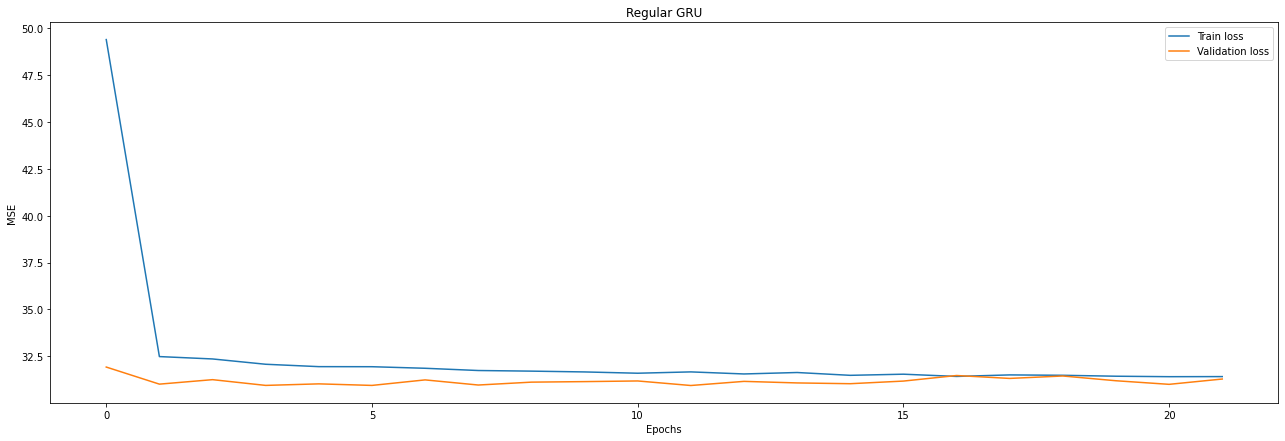

In [ ]:
fig, ax1 = plt.subplots(1, sharey=True,figsize=(22,7))

ax1.plot(gru_history.history['loss'], label='Train loss')
ax1.plot(gru_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Regular GRU')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

plt.show()

In [ ]:
lstm_train_pred = gru_model.predict(X_train)
lstm_val_pred = gru_model.predict(X_valid)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

Train rmse: 5.5814899564761635
Validation rmse: 5.593330007343066
